<a href="https://colab.research.google.com/github/lianmega/PVCK_2023/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install pytesseract

In [4]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from google.colab.patches import cv2_imshow

In [5]:
def threshold(image, t):
  # Inisialisasi matriks hasil
  result = np.zeros(image.shape, dtype=np.uint8)

   # Thresholding
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      if image[i][j] > t:
        result[i][j] = 255
      else:
        result[i][j] = image[i][j]

  return result

In [6]:
# Baca citra input
image = cv2.imread('/content/drive/MyDrive/PCVK/gradient.jpg')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Thresholding BINARY
binary = threshold(gray_image, 170)

# Thresholding BINARY_INV
binary_inv = 255 - threshold(gray_image, 170)

# Thresholding TRUNC
trunc = threshold(gray_image, 170)

# Thresholding TOZERO
tozero = threshold(gray_image, 170)
tozero[tozero == 255] = 0

# Thresholding TOZERO_INV
tozero_inv = 255 - threshold(gray_image, 170)
tozero_inv[tozero_inv == 255] = 0

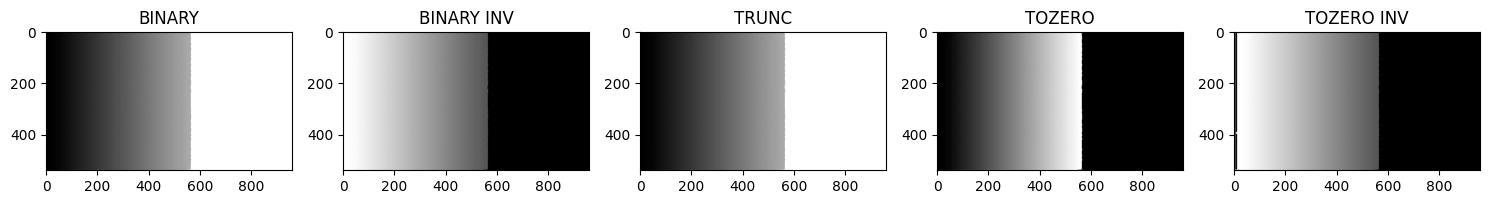

In [7]:
plt.figure(figsize=(15,6))

plt.subplot(151)
plt.imshow(binary, cmap='gray')
plt.title('BINARY')

plt.subplot(152)
plt.imshow(binary_inv, cmap='gray')
plt.title('BINARY INV')

plt.subplot(153)
plt.imshow(trunc, cmap='gray')
plt.title('TRUNC')

plt.subplot(154)
plt.imshow(tozero, cmap='gray')
plt.title('TOZERO')

plt.subplot(155)
plt.imshow(tozero_inv, cmap='gray')
plt.title('TOZERO INV')

plt.tight_layout()
plt.show()

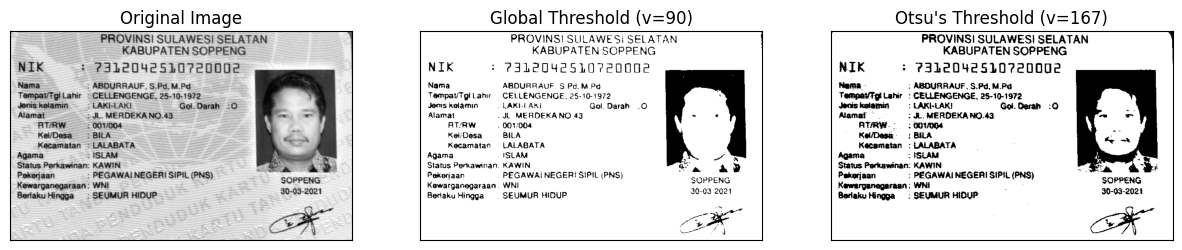

In [8]:
def _compute_otsu_criteria(im, th):
    # create the thresholded image
    thresholded_im = np.zeros(im.shape)
    thresholded_im[im >= th] = 1

    # compute weights
    nb_pixels = im.size
    nb_pixels1 = np.count_nonzero(thresholded_im)
    weight1 = nb_pixels1 / nb_pixels
    weight0 = 1 - weight1

    # if one of the classes is empty, eg all pixels are below or above the threshold, that threshold will not be considered
    # in the search for the best threshold
    if weight1 == 0 or weight0 == 0:
        return np.inf

    # find all pixels belonging to each class
    val_pixels1 = im[thresholded_im == 1]
    val_pixels0 = im[thresholded_im == 0]

    # compute variance of these classes
    var1 = np.var(val_pixels1) if len(val_pixels1) > 0 else 0
    var0 = np.var(val_pixels0) if len(val_pixels0) > 0 else 0

    return weight0 * var0 + weight1 * var1

def otsuThresholding(img: np.ndarray) -> np.ndarray:
    threshold_range = range(np.max(img)+1)
    criterias = np.array([_compute_otsu_criteria(img, th) for th in threshold_range])

    # best threshold is the one minimizing the Otsu criteria
    best_threshold = threshold_range[np.argmin(criterias)]

    binary = img.copy()
    binary[binary > best_threshold] = 255
    binary[binary <= best_threshold] = 0

    return binary

if __name__ == '__main__':
    filename = '/content/drive/MyDrive/PCVK/KTP.jpeg'
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

    # Global Threshold (v=90)
    global_threshold = 90
    _, global_thresholded = cv2.threshold(img, global_threshold, 255, cv2.THRESH_BINARY)

    # Otsu Thresholding
    otsu_thresholded = otsuThresholding(img)

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(img, 'gray')
    plt.title('Original Image')
    plt.xticks([]), plt.yticks([])

    plt.subplot(1, 3, 2)
    plt.imshow(global_thresholded, 'gray')
    plt.title(f'Global Threshold (v={global_threshold})')
    plt.xticks([]), plt.yticks([])

    plt.subplot(1, 3, 3)
    plt.imshow(otsu_thresholded, 'gray')
    plt.title("Otsu's Threshold (v=167)")
    plt.xticks([]), plt.yticks([])

    plt.show()

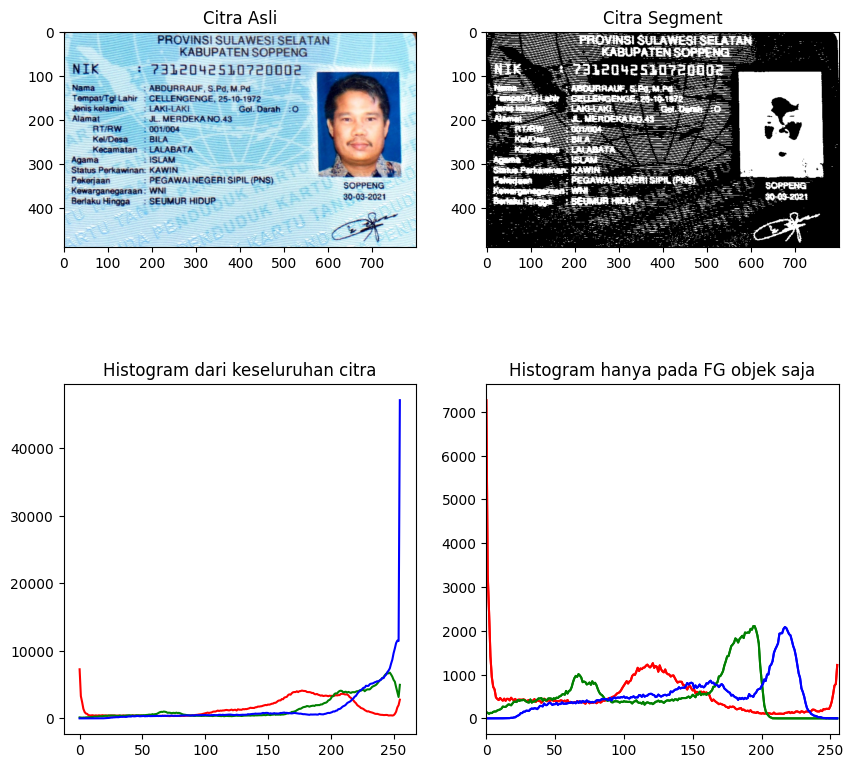

In [9]:
filename_3 = ('/content/drive/MyDrive/PCVK/KTP.jpeg')
img_l = cv2.imread(filename_3)
img_rgb = cv2.cvtColor(img_l,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv2.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

plt.show()

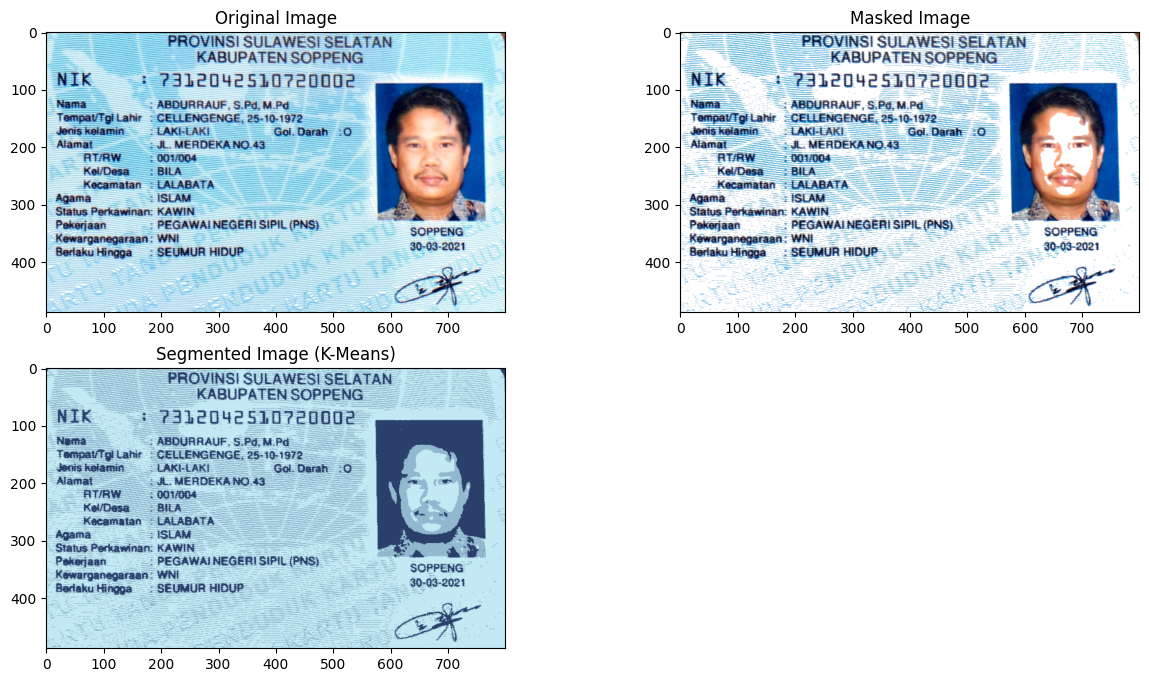

In [10]:
# Load the image
filename = '/content/drive/MyDrive/PCVK/KTP.jpeg'
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Flatten the pixel values
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define the criteria and the number of clusters (k)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3# Number of clusters

# Apply K-Means clustering
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to integers
centers = np.uint8(centers)

# Flatten the labels array
labels = labels.flatten()

# Create a masked image by turning one cluster into white
masked_image = np.copy(img)
masked_image = masked_image.reshape((-1, 3))
cluster_to_white = 2
masked_image[labels == cluster_to_white] = [255, 255, 255]
masked_image = masked_image.reshape(img.shape)

# Convert the segmented image back to the original shape
segmented_image = centers[labels].reshape(img.shape)

# Display the original image, segmented image, and masked image
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1), plt.imshow(img)
plt.title('Original Image')

plt.subplot(2, 2, 2), plt.imshow(masked_image)
plt.title('Masked Image')

plt.subplot(2, 2, 3), plt.imshow(segmented_image)
plt.title('Segmented Image (K-Means)')

plt.show()

TUGAS PRAKTIKUM

In [11]:
import os
import random
from sklearn.cluster import KMeans

In [12]:
directory = '/content/drive/MyDrive/PCVK/KTP_More'

In [15]:
image_files = [file for file in os.listdir(directory)if file.endswith((".jpg", ".jpeg", ".png"))]

for img_file in image_files:
  img_path = os.path.join(directory, img_file)

  img = cv2.imread(img_path)

  plt.figure
  plt.axis("off")
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

NotADirectoryError: ignored